# Long Island multi-family housing units
By Suhail



In [39]:
import pandas as pd
import re

import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv('housing.csv')
housing['fixedYear'] = housing.year.str.extract(r"(\d\d\d\d)").astype(float)

In [3]:
df = housing[housing.fixedYear > 1969]

descriptor of the data below. more housing projects now

In [4]:
df.head(1)

,the_geom,county,city_village_or_cdp,housing_type,complex_name,complex_address,units,acres,status,year,...,longitude,accuracy_score,accuracy_type,number,street,city,zip,country,source,fixedYear
0,0101000020E6100000B7F4C3639A2F52C0A99D06B1D87B...,Suffolk,Baiting Hollow,COND,Vistas of Baiting Hollow,100 Fox Hill Dr.,21,8.0,PROP,2016,...,-72.743798,1.0,street_address,100,Fox Hill Dr,Riverhead,NaN,US,Google Script,2016.0


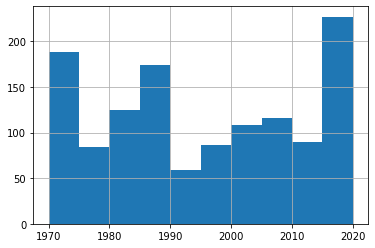

In [5]:
df.fixedYear.hist()

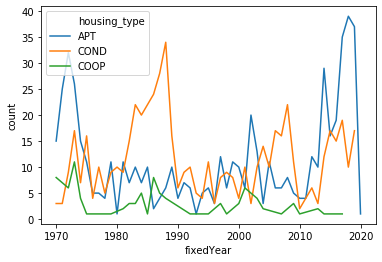

In [6]:
overTime = df.groupby('housing_type').fixedYear.value_counts().reset_index(name='count')

sns.lineplot(data=overTime, x='fixedYear',y='count', hue='housing_type')

In [7]:
df.to_csv('housing-cleaned.csv', index=False)

In [32]:
house_count = df.fixedYear.value_counts().reset_index(name='count')
house_count.head()

,index,count
0,2017.0,55
1,2019.0,54
2,1973.0,54
3,2018.0,49
4,1972.0,47


,status,fixedYear,total
0,BUILT,1971.0,4
1,BUILT,1972.0,4
2,BUILT,1973.0,4
3,BUILT,2004.0,3
4,BUILT,2008.0,3
5,BUILT,2012.0,3
6,BUILT,2015.0,3
7,BUILT,2016.0,3
8,BUILT,2017.0,3
9,BUILT,1975.0,2


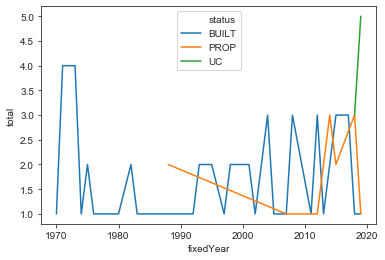

In [107]:
affordable_housing = df.loc[df['comment'] == 'AFFORD']
afford_housing_status = affordable_housing.groupby('status').fixedYear.value_counts().reset_index(name='total')
sns.lineplot(data=afford_housing_status, x='fixedYear',y='total', hue='status')

afford_housing_status


In [93]:
affordable_housing_count = affordable_housing.fixedYear.value_counts().reset_index(name='count')
affordable_housing_count.head(5)

,index,count
0,2019.0,7
1,2018.0,7
2,2014.0,5
3,2015.0,5
4,1971.0,4


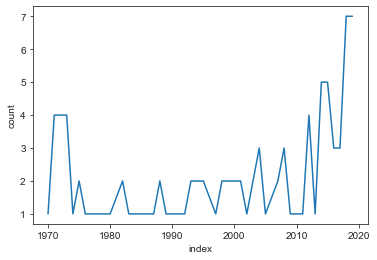

In [77]:
sns.lineplot(data=affordable_housing_count, x='index',y='count')

,fixedYear,total_units
0,1970.0,176
1,1971.0,617
2,1972.0,568
3,1973.0,453
4,1974.0,100
5,1975.0,234
6,1976.0,13
7,1978.0,104
8,1980.0,30
9,1982.0,45


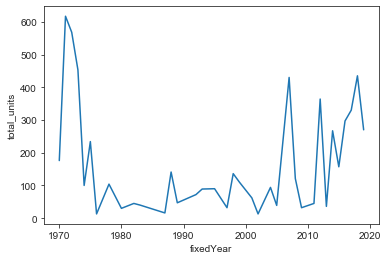

In [108]:
affordable_housing_units = affordable_housing.groupby('fixedYear').units.sum().reset_index(name = 'total_units')
sns.lineplot(data=affordable_housing_units, x='fixedYear',y='total_units')
affordable_housing_units